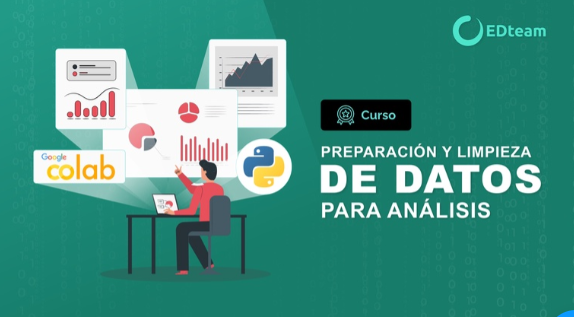

# Preparación de los datos
La preparación de datos es un paso escencial en el flujo de trabajo de Machine learning (ML)
Consiste en transformar los datos en un formato adecuado para su uso en modelos predictivos. Es un procesos crítico por que la calidad de los datos afecta directamente el rendimiento del modelo.
# 1. Recolección de datos
Este es el primer paso y consiste en obtener datos relevantes de diversas fuentes, como bases de datos, APIs, sensores, web scraping o archivos locales. Los datos deben ser representativos del problema que se desea resolver.

# 2. Inspección y Limpieza de datos.
- Eliminar datos duplicados: Remover registros repetidos.
- Manejo de valores faltantes:
- Imputación(rellenar valores faltantes, con la media, mediana, moda, etc)
- Eliminación de registros incompletos.
- Corrección de errores:Detectar y corregir datos inconsistentes o erróneos.

## Tratamiento de outliers:
- Identificarlos usando estadisticas descriptivas o métodos como el rango intercuartil.
- Decidir eliminarlos o transformarlos

# 3. Seleccion y transformación de características
## Objetivo: Escoger y procesar las variables más relevantes.

## 1. Selección de características.
- Eliminar variables irrelevantes o redundantes.
- Usar técnicas como selección univariante, selección basada en modelos o métodos como PCA.
- 
# 2. Cidificación de variables categóricas:
- Label Encoding: Asignar un número a cada categoría.
- OneHot Encoding: Crear columnas binarias columnas binarias para cada categoría.

# 3. Escalado de carácteristicas:
- Normalización: Escalar valores entre 0 y 1.
- -Estandarización: ajustar los valores que tengan media 0 y desviación estándar de 1.

# 4. Generar nuevas caracteristicas:
- Combinar o transformar las existentes para crear nuevas variables más informativas


In [1]:
import arff 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

-  with (data_path, 'r' ) as train_set:open : se habre un archivo en modo lectura con el nombre train_test_split
- with garantiza que el archivo se cierre
-   arff.load(train_set) el conjunto de datos se retorna como un diccionario de datos y se almacena en dataset el diccionario tiene los atributos del       archivo y sus valores.
- dataset['attributes'] nos da acceso a una lista de atributos del archivo ARFF. Donde cada atributo es una tupla o lista con el nombre del atributo y    su tipo ('age', 'numeric')

- attributes = [attr[0] for attr in dataset['attributes´]]
  es un proceso de extraer solo el nombre del atributo attr[0]de cada tupla en la lista


""" La función abre un archivo """
# Funcion que carga el conjunto de datos
DF = None
def load_kdd_dataset(data_path):
    with open(data_path, 'r') as grupo_entreno: # Se abre el archivo en modo lectura
        dataset=arff.load(grupo_entreno)        # En dataset se carga un diccionario con los datos
        attributes = [attr[0] for attr in dataset["attributes"]]  # se retorna lel nombre del atributo
        df = pd.DataFrame(dataset["data"], columns = attributes)
        return  df
    

## en la primera divicion se dividen los datos en datos de entrenamiento y prueba en proporcion 60/40 %
## En la segunda divisionse dividen los datos de prueba en 50% para prueba y 50 por ciento para validar
## Si stratify no es none es decir es el nombre de una caracteristica  se logra que cada grupo de datos mantenga una proporcion y reprentatividad de cada clase en el grupo

## Si shuffle = True si provoca que el algoritmo utilice un proceso de mexclado aleatorio de los datos antes de dividirlos


# 1. lectura del conjunto de datos

In [37]:
# Funcion que carga el conjunto de datos
DF = None
def load_kdd_dataset(data_path):
    with open(data_path, 'r') as grupo_entreno:
        dataset=arff.load(grupo_entreno)
        attributes = [attr[0] for attr in dataset["attributes"]]
        DF = pd.DataFrame(dataset["data"], columns = attributes)
        return DF

# Función para dividir los datos en entrenamiento, validacion y prueba

In [38]:
# random_state es un valor de semilla por defecto es 42 usado cuando se shuffle = True los datos se mezclan aleatoriamente
#Antes de hacer la division de los datos
#En otras palabras shuffle = False puede generar sesgos si los datos estan ordenados
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None       
    train_set, test_set = train_test_split(df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return train_set, val_set, test_set


# 2. Division del conjunto de datos

In [39]:
df = load_kdd_dataset("datasets/NSL-KDD/KDDTrain+.arff")

In [40]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,25.0,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
125969,8.0,udp,private,SF,105.0,145.0,0,0.0,0.0,0.0,...,244.0,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0.0,tcp,smtp,SF,2231.0,384.0,0,0.0,0.0,0.0,...,30.0,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0.0,tcp,klogin,S0,0.0,0.0,0,0.0,0.0,0.0,...,8.0,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [41]:
train_set, val_set, test_set = train_val_test_split(df, stratify='protocol_type', shuffle=True)

In [42]:
print("Longitud del Trainning Set: ", len(train_set))
print("Longitud del Validation Set: ", len(val_set))
print("Longitud del Test Set: ", len(test_set))

Longitud del Trainning Set:  75583
Longitud del Validation Set:  25195
Longitud del Test Set:  25195


# 3. Limpieza de los datos

<Axes: >

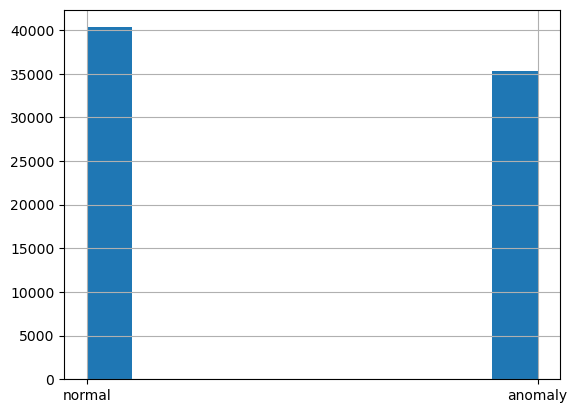

In [43]:
# #Separamos las caracteristicas de entrada de las caracteristicas de salida  "class"
X_train = train_set.drop("class", axis=1)    #Quitamos la seria class del dataset de entrenamiento
y_train = train_set["class"].copy()
y_train.hist()

In [23]:
print("Dataset de entrenamiento")
print(X_train)

Dataset de entrenamiento
        duration protocol_type  service flag  src_bytes  dst_bytes land  \
113467       0.0           tcp     http   SF      407.0    53508.0    0   
31899        0.0           tcp  private   S0        0.0        0.0    0   
108116       0.0           tcp     http   SF      304.0      636.0    0   
89913        0.0           tcp  private   S0        0.0        0.0    0   
106319       0.0          icmp    eco_i   SF        8.0        0.0    0   
...          ...           ...      ...  ...        ...        ...  ...   
64559        0.0           tcp   systat   S0        0.0        0.0    0   
67272        0.0           tcp     http   SF      210.0      736.0    0   
32452        3.0           tcp     smtp   SF      889.0      328.0    0   
112657       0.0           tcp     http   SF      284.0      444.0    0   
99030        0.0           tcp     http   SF      209.0     3127.0    0   

        wrong_fragment  urgent  hot  ...  dst_host_count dst_host_srv_coun

In [44]:
print("Clase para el entrenamiento")
print(y_train)

Clase para el entrenamiento
113467     normal
31899     anomaly
108116     normal
89913     anomaly
106319    anomaly
           ...   
64559     anomaly
67272      normal
32452      normal
112657     normal
99030      normal
Name: class, Length: 75583, dtype: object


# Para efecto de simular que nuestros datos tienen valores nulos vamos se va a insertar artificialmenmte valores nulos

## X_train.loc[...]:

El loc[] es una forma de seleccionar y modificar datos en un DataFrame de pandas usando tanto índices de fila como nombres de columnas.
La sintaxis es: X_train.loc[fila, columna].
fila y columna:

La fila puede ser un índice de las filas (número o condiciones) y la columna es el nombre de la columna.
En este caso, estás usando una condición de fila (un filtro que selecciona las filas donde se cumple cierta condición) y el nombre de la columna ("src_bytes") que deseas modificar.
Condición (X_train["src_bytes"] > 400) & (X_train["src_bytes"] < 800):

Esta condición selecciona las filas de X_train donde el valor de la columna "src_bytes" está en el rango de 400 a 800, excluyendo 400 y 800.
(X_train["src_bytes"] > 400) & (X_train["src_bytes"] < 800) devuelve una serie de valores booleanos (True/False), indicando en qué filas el valor de "src_bytes" cumple con esa condición.
Asignación de NaN:

Después de aplicar el filtro, seleccionas la columna "src_bytes" con , "src_bytes" y le asignas el valor np.nan.
np.nan es un valor especial que indica "no disponible" o "valor perdido".
Por lo tanto, en las filas que cumplen la condición del filtro, el valor de la columna "src_bytes" se reemplaza por NaN.

# X_train.loc[(X_train["src_bytes"] >400) & (X_train["src_bytes"] < 800), "src_bytes"] = np.nan

In [11]:
#X_train.loc[(X_train["dst_bytes"] >500) & (X_train["dst_bytes"] <2000), "dst_bytes"] = np.nan

In [45]:
fila = (X_train["src_bytes"] > 400) & (X_train["src_bytes"] <800)
X_train.loc[fila, "src_bytes"]=np.nan

fila = (X_train["dst_bytes"] > 500) & (X_train["dst_bytes"] < 2000)
X_train.loc[fila, "dst_bytes"] = np.nan
X_train


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
113467,0.0,tcp,http,SF,NaN,53508.0,0,0.0,0.0,0.0,...,9.0,255.0,1.00,0.00,0.11,0.03,0.00,0.00,0.0,0.0
31899,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,255.0,4.0,0.02,0.05,0.00,0.00,1.00,1.00,0.0,0.0
108116,0.0,tcp,http,SF,304.0,NaN,0,0.0,0.0,0.0,...,39.0,255.0,1.00,0.00,0.03,0.06,0.00,0.00,0.0,0.0
89913,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,255.0,15.0,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.0
106319,0.0,icmp,eco_i,SF,8.0,0.0,0,0.0,0.0,0.0,...,2.0,7.0,1.00,0.00,1.00,0.57,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64559,0.0,tcp,systat,S0,0.0,0.0,0,0.0,0.0,0.0,...,255.0,20.0,0.08,0.06,0.00,0.00,1.00,1.00,0.0,0.0
67272,0.0,tcp,http,SF,210.0,NaN,0,0.0,0.0,0.0,...,119.0,255.0,1.00,0.00,0.01,0.02,0.02,0.01,0.0,0.0
32452,3.0,tcp,smtp,SF,889.0,328.0,0,0.0,0.0,0.0,...,111.0,155.0,0.64,0.04,0.01,0.01,0.01,0.00,0.0,0.0
112657,0.0,tcp,http,SF,284.0,444.0,0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0


# Eliminando valores nulos de nuestro dataset
La mayoría de algoritmos de machine learning no puedentrabajar sobre caracteristicas que contengan valores nulos. Por esllo, existen tres opciones de reemplazarlos.

- Eliminar las filas correspondientes
- Eliminar el atributo columna correspondiente
- Rellenarlos con un valor determinado.


# Obtencion de el conjunto de filas con valores nulos
X_train[].isnull() retorna el dataFrame del mismo tamaño que X_train donde en cada posición hay un True o un False dependiendo si hay o no valores nulos
el método any() se aplica a lo largo de todo el eje 1 (filas) verificando si algun valor es nullo

### X_train[X_train.isnull().any(axis=1)]
- Se obtiene el dataset con valores nullo True/false y se evalua a lo largo del eje 1 (filas) Cual es True (-Tiene nulo)
- Se retorna el dataset cuyas filas son nulos o se seleccionanlas filas con al menos un valor null

In [46]:
#Seleccionamos las filas con valores nulos
#print(X_train.isnull().any(axis=1))
filas_nulos = X_train[X_train.isnull().any(axis=1)]
filas_nulos

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
113467,0.0,tcp,http,SF,NaN,53508.0,0,0.0,0.0,0.0,...,9.0,255.0,1.00,0.00,0.11,0.03,0.00,0.00,0.0,0.0
108116,0.0,tcp,http,SF,304.0,NaN,0,0.0,0.0,0.0,...,39.0,255.0,1.00,0.00,0.03,0.06,0.00,0.00,0.0,0.0
64957,1.0,tcp,smtp,SF,NaN,329.0,0,0.0,0.0,0.0,...,198.0,181.0,0.65,0.03,0.01,0.01,0.02,0.02,0.0,0.0
100052,0.0,tcp,http,SF,206.0,NaN,0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
99158,0.0,tcp,http,SF,291.0,NaN,0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117260,0.0,tcp,http,SF,321.0,NaN,0,0.0,0.0,0.0,...,2.0,255.0,1.00,0.00,0.50,0.02,0.00,0.00,0.0,0.0
110723,0.0,tcp,http,SF,361.0,NaN,0,0.0,0.0,0.0,...,40.0,255.0,1.00,0.00,0.03,0.06,0.00,0.00,0.0,0.0
58053,0.0,tcp,http,SF,202.0,NaN,0,0.0,0.0,0.0,...,83.0,255.0,1.00,0.00,0.01,0.01,0.00,0.00,0.0,0.0
70184,0.0,tcp,http,SF,315.0,NaN,0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0


# Opción 1 Eliminar las filas con valures null
- Se elimina del dataset las filas que tengan valores nulos en cualquiera de las columnas especificadas en el subset
- El cambio se hara directamente sobre el dataset
- dropna() el metodo elimina filas o columnas que tengan valores nulos

In [47]:
X_train_copy = X_train.copy()
X_train_copy.dropna(subset=["src_bytes", "dst_bytes"], inplace=True)
X_train_copy

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
31899,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,255.0,4.0,0.02,0.05,0.00,0.00,1.00,1.0,0.0,0.0
89913,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,255.0,15.0,0.06,0.07,0.00,0.00,1.00,1.0,0.0,0.0
106319,0.0,icmp,eco_i,SF,8.0,0.0,0,0.0,0.0,0.0,...,2.0,7.0,1.00,0.00,1.00,0.57,0.00,0.0,0.0,0.0
98007,0.0,udp,domain_u,SF,46.0,139.0,0,0.0,0.0,0.0,...,255.0,254.0,1.00,0.01,0.00,0.00,0.00,0.0,0.0,0.0
16447,0.0,tcp,smtp,SF,1790.0,363.0,0,0.0,0.0,0.0,...,141.0,137.0,0.55,0.04,0.01,0.01,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90665,0.0,tcp,ftp_data,S0,0.0,0.0,0,0.0,0.0,0.0,...,255.0,63.0,0.25,0.02,0.02,0.00,1.00,1.0,0.0,0.0
64559,0.0,tcp,systat,S0,0.0,0.0,0,0.0,0.0,0.0,...,255.0,20.0,0.08,0.06,0.00,0.00,1.00,1.0,0.0,0.0
32452,3.0,tcp,smtp,SF,889.0,328.0,0,0.0,0.0,0.0,...,111.0,155.0,0.64,0.04,0.01,0.01,0.01,0.0,0.0,0.0
112657,0.0,tcp,http,SF,284.0,444.0,0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0


In [48]:
print("El numero de filas eliminadas es :", len(X_train)- len(X_train_copy))

El numero de filas eliminadas es : 9886


#Se eliminan los atributos con valores nulos descritos en la lista
#El metodo drop no elimina  atributos o columnas con valores nulos automaticamente,
# el  metodo drop() elimina los atributos indicados en la lista y con x=1 indicamos que toda la columna

In [49]:
X_train_copy = X_train.copy()
X_train_copy.drop(["src_bytes", "dst_bytes"], inplace=True, axis=1)
X_train_copy

,duration,protocol_type,service,flag,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
113467,0.0,tcp,http,SF,0,0.0,0.0,0.0,0.0,1,...,9.0,255.0,1.00,0.00,0.11,0.03,0.00,0.00,0.0,0.0
31899,0.0,tcp,private,S0,0,0.0,0.0,0.0,0.0,0,...,255.0,4.0,0.02,0.05,0.00,0.00,1.00,1.00,0.0,0.0
108116,0.0,tcp,http,SF,0,0.0,0.0,0.0,0.0,1,...,39.0,255.0,1.00,0.00,0.03,0.06,0.00,0.00,0.0,0.0
89913,0.0,tcp,private,S0,0,0.0,0.0,0.0,0.0,0,...,255.0,15.0,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.0
106319,0.0,icmp,eco_i,SF,0,0.0,0.0,0.0,0.0,0,...,2.0,7.0,1.00,0.00,1.00,0.57,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64559,0.0,tcp,systat,S0,0,0.0,0.0,0.0,0.0,0,...,255.0,20.0,0.08,0.06,0.00,0.00,1.00,1.00,0.0,0.0
67272,0.0,tcp,http,SF,0,0.0,0.0,0.0,0.0,1,...,119.0,255.0,1.00,0.00,0.01,0.02,0.02,0.01,0.0,0.0
32452,3.0,tcp,smtp,SF,0,0.0,0.0,0.0,0.0,1,...,111.0,155.0,0.64,0.04,0.01,0.01,0.01,0.00,0.0,0.0
112657,0.0,tcp,http,SF,0,0.0,0.0,0.0,0.0,1,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0


# Como eliminar atributos con valores nuloa
# Como eliminar filas que tienen un valor nulo en algunas caracteristicas específicas}


# Opción 3
es probable que eliminar atributos o filas de un dataset no sea la mejor opcion por lo que podemos calcular la media en aquellos atributos que tienen nulos en sus filas y luego asignar este valor a aquellas celdas con valor null


In [56]:
X_train_copy = X_train.copy()
X_train_copy

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
113467,0.0,tcp,http,SF,NaN,53508.0,0,0.0,0.0,0.0,...,9.0,255.0,1.00,0.00,0.11,0.03,0.00,0.00,0.0,0.0
31899,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,255.0,4.0,0.02,0.05,0.00,0.00,1.00,1.00,0.0,0.0
108116,0.0,tcp,http,SF,304.0,NaN,0,0.0,0.0,0.0,...,39.0,255.0,1.00,0.00,0.03,0.06,0.00,0.00,0.0,0.0
89913,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,255.0,15.0,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.0
106319,0.0,icmp,eco_i,SF,8.0,0.0,0,0.0,0.0,0.0,...,2.0,7.0,1.00,0.00,1.00,0.57,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64559,0.0,tcp,systat,S0,0.0,0.0,0,0.0,0.0,0.0,...,255.0,20.0,0.08,0.06,0.00,0.00,1.00,1.00,0.0,0.0
67272,0.0,tcp,http,SF,210.0,NaN,0,0.0,0.0,0.0,...,119.0,255.0,1.00,0.00,0.01,0.02,0.02,0.01,0.0,0.0
32452,3.0,tcp,smtp,SF,889.0,328.0,0,0.0,0.0,0.0,...,111.0,155.0,0.64,0.04,0.01,0.01,0.01,0.00,0.0,0.0
112657,0.0,tcp,http,SF,284.0,444.0,0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0


In [62]:
X = X_train

In [64]:
media_srcbytes = X_train_copy["src_bytes"].mean()
media_dstbytes = X_train_copy["dst_bytes"].mean()

X_train_copy["src_bytes"].fillna(media_srcbytes, inplace=True) ##Rellenamos con la media aquellas celdas con valor null en el atributo en cuestion
X_train_copy["dst_bytes"].fillna(media_dstbytes, inplace=True)
X_train_copy

C:\Users\12345\AppData\Local\Temp\ipykernel_13580\3330142694.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_copy["src_bytes"].fillna(media_srcbytes, inplace=True) ##Rellenamos con la media aquellas celdas con valor null en el atributo en cuestion
C:\Users\12345\AppData\Local\Temp\ipykernel_13580\3330142694.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
113467,0.0,tcp,http,SF,66914.530762,53508.000000,0,0.0,0.0,0.0,...,9.0,255.0,1.00,0.00,0.11,0.03,0.00,0.00,0.0,0.0
31899,0.0,tcp,private,S0,0.000000,0.000000,0,0.0,0.0,0.0,...,255.0,4.0,0.02,0.05,0.00,0.00,1.00,1.00,0.0,0.0
108116,0.0,tcp,http,SF,304.000000,9181.334754,0,0.0,0.0,0.0,...,39.0,255.0,1.00,0.00,0.03,0.06,0.00,0.00,0.0,0.0
89913,0.0,tcp,private,S0,0.000000,0.000000,0,0.0,0.0,0.0,...,255.0,15.0,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.0
106319,0.0,icmp,eco_i,SF,8.000000,0.000000,0,0.0,0.0,0.0,...,2.0,7.0,1.00,0.00,1.00,0.57,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64559,0.0,tcp,systat,S0,0.000000,0.000000,0,0.0,0.0,0.0,...,255.0,20.0,0.08,0.06,0.00,0.00,1.00,1.00,0.0,0.0
67272,0.0,tcp,http,SF,210.000000,9181.334754,0,0.0,0.0,0.0,...,119.0,255.0,1.00,0.00,0.01,0.02,0.02,0.01,0.0,0.0
32452,3.0,tcp,smtp,SF,889.000000,328.000000,0,0.0,0.0,0.0,...,111.0,155.0,0.64,0.04,0.01,0.01,0.01,0.00,0.0,0.0
112657,0.0,tcp,http,SF,284.000000,444.000000,0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0


# La opción de usar la media podría no ser la mejor depende del caso particular
Podríamos tenenr algunos valore de un atributo muy alto tal que generara una media alta

Otra opcion es usar la moda(Valor que mas se repite)


In [65]:
X_train_Copy = X.copy()
X_train_copy

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
113467,0.0,tcp,http,SF,66914.530762,53508.000000,0,0.0,0.0,0.0,...,9.0,255.0,1.00,0.00,0.11,0.03,0.00,0.00,0.0,0.0
31899,0.0,tcp,private,S0,0.000000,0.000000,0,0.0,0.0,0.0,...,255.0,4.0,0.02,0.05,0.00,0.00,1.00,1.00,0.0,0.0
108116,0.0,tcp,http,SF,304.000000,9181.334754,0,0.0,0.0,0.0,...,39.0,255.0,1.00,0.00,0.03,0.06,0.00,0.00,0.0,0.0
89913,0.0,tcp,private,S0,0.000000,0.000000,0,0.0,0.0,0.0,...,255.0,15.0,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.0
106319,0.0,icmp,eco_i,SF,8.000000,0.000000,0,0.0,0.0,0.0,...,2.0,7.0,1.00,0.00,1.00,0.57,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64559,0.0,tcp,systat,S0,0.000000,0.000000,0,0.0,0.0,0.0,...,255.0,20.0,0.08,0.06,0.00,0.00,1.00,1.00,0.0,0.0
67272,0.0,tcp,http,SF,210.000000,9181.334754,0,0.0,0.0,0.0,...,119.0,255.0,1.00,0.00,0.01,0.02,0.02,0.01,0.0,0.0
32452,3.0,tcp,smtp,SF,889.000000,328.000000,0,0.0,0.0,0.0,...,111.0,155.0,0.64,0.04,0.01,0.01,0.01,0.00,0.0,0.0
112657,0.0,tcp,http,SF,284.000000,444.000000,0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0


In [69]:
X


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
113467,0.0,tcp,http,SF,NaN,53508.0,0,0.0,0.0,0.0,...,9.0,255.0,1.00,0.00,0.11,0.03,0.00,0.00,0.0,0.0
31899,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,255.0,4.0,0.02,0.05,0.00,0.00,1.00,1.00,0.0,0.0
108116,0.0,tcp,http,SF,304.0,NaN,0,0.0,0.0,0.0,...,39.0,255.0,1.00,0.00,0.03,0.06,0.00,0.00,0.0,0.0
89913,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,255.0,15.0,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.0
106319,0.0,icmp,eco_i,SF,8.0,0.0,0,0.0,0.0,0.0,...,2.0,7.0,1.00,0.00,1.00,0.57,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64559,0.0,tcp,systat,S0,0.0,0.0,0,0.0,0.0,0.0,...,255.0,20.0,0.08,0.06,0.00,0.00,1.00,1.00,0.0,0.0
67272,0.0,tcp,http,SF,210.0,NaN,0,0.0,0.0,0.0,...,119.0,255.0,1.00,0.00,0.01,0.02,0.02,0.01,0.0,0.0
32452,3.0,tcp,smtp,SF,889.0,328.0,0,0.0,0.0,0.0,...,111.0,155.0,0.64,0.04,0.01,0.01,0.01,0.00,0.0,0.0
112657,0.0,tcp,http,SF,284.0,444.0,0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0


In [72]:
X_train


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
113467,0.0,tcp,http,SF,NaN,53508.0,0,0.0,0.0,0.0,...,9.0,255.0,1.00,0.00,0.11,0.03,0.00,0.00,0.0,0.0
31899,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,255.0,4.0,0.02,0.05,0.00,0.00,1.00,1.00,0.0,0.0
108116,0.0,tcp,http,SF,304.0,NaN,0,0.0,0.0,0.0,...,39.0,255.0,1.00,0.00,0.03,0.06,0.00,0.00,0.0,0.0
89913,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,255.0,15.0,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.0
106319,0.0,icmp,eco_i,SF,8.0,0.0,0,0.0,0.0,0.0,...,2.0,7.0,1.00,0.00,1.00,0.57,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64559,0.0,tcp,systat,S0,0.0,0.0,0,0.0,0.0,0.0,...,255.0,20.0,0.08,0.06,0.00,0.00,1.00,1.00,0.0,0.0
67272,0.0,tcp,http,SF,210.0,NaN,0,0.0,0.0,0.0,...,119.0,255.0,1.00,0.00,0.01,0.02,0.02,0.01,0.0,0.0
32452,3.0,tcp,smtp,SF,889.0,328.0,0,0.0,0.0,0.0,...,111.0,155.0,0.64,0.04,0.01,0.01,0.01,0.00,0.0,0.0
112657,0.0,tcp,http,SF,284.0,444.0,0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0


In [73]:
mediana_srcbytes = X_train_copy["src_bytes"].median()
mediana_dstbytes = X_train_copy["dst_bytes"].median()
X_train_copy["src_bytes"].fillna(mediana_srcbytes, inplace = True)
X_train_copy["dst_bytes"].fillna(mediana_dstbytes, inplace = True)
X_train_copy

C:\Users\12345\AppData\Local\Temp\ipykernel_13580\1415678717.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_copy["src_bytes"].fillna(mediana_srcbytes, inplace = True)
C:\Users\12345\AppData\Local\Temp\ipykernel_13580\1415678717.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
113467,0.0,tcp,http,SF,66914.530762,53508.000000,0,0.0,0.0,0.0,...,9.0,255.0,1.00,0.00,0.11,0.03,0.00,0.00,0.0,0.0
31899,0.0,tcp,private,S0,0.000000,0.000000,0,0.0,0.0,0.0,...,255.0,4.0,0.02,0.05,0.00,0.00,1.00,1.00,0.0,0.0
108116,0.0,tcp,http,SF,304.000000,9181.334754,0,0.0,0.0,0.0,...,39.0,255.0,1.00,0.00,0.03,0.06,0.00,0.00,0.0,0.0
89913,0.0,tcp,private,S0,0.000000,0.000000,0,0.0,0.0,0.0,...,255.0,15.0,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.0
106319,0.0,icmp,eco_i,SF,8.000000,0.000000,0,0.0,0.0,0.0,...,2.0,7.0,1.00,0.00,1.00,0.57,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64559,0.0,tcp,systat,S0,0.000000,0.000000,0,0.0,0.0,0.0,...,255.0,20.0,0.08,0.06,0.00,0.00,1.00,1.00,0.0,0.0
67272,0.0,tcp,http,SF,210.000000,9181.334754,0,0.0,0.0,0.0,...,119.0,255.0,1.00,0.00,0.01,0.02,0.02,0.01,0.0,0.0
32452,3.0,tcp,smtp,SF,889.000000,328.000000,0,0.0,0.0,0.0,...,111.0,155.0,0.64,0.04,0.01,0.01,0.01,0.00,0.0,0.0
112657,0.0,tcp,http,SF,284.000000,444.000000,0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0


# Alternativa 3 para sustituir los valores nulos
Consiste en usar la clase SimpleImputer de sklearn
Forma parte de la librería Scikit-learn, una herramienta popular de machine learning en python. Se utiliza para manejar valores faltantes o nulos en los conjuntos de datos, lo cual es una terea comun antes de aplicar modelos de Machine Learning.

En muchos casos los valores faltantes o nulos(NAN)  pueden generar errores o distorcionar los resultados al aplicar los algiritmosbde machine Learning. Por lo tanto, es necesario tratar estos valores antes de entrenar los modelos. La clase SimpleImputer proporciona una forma de rellenar estos valores faltantes antes de entrenar los modelos de una manera sencilla utilizando estrategias de Imputación.

## ¿Que hace SimpleImputer?
Reemplaza los valores null  en los datos con un valor calculado a partir de la propia distribución de los datos. Los valores faltantes pueden ser imputados de diferentes maneras segun la estrategia que se elija

## Objetivo principal de SimpleImputer:

- Imputar valores faltantes de manera eficiente y automatizada, utilizando estrategias predefinidas.
- Simplificar el proceso de manejo de los datos incompletos, de modo que los modelos de machine learning puedan funcionar correctamente sin necesidad de intervención manual en cada valor faltante.

## 1. Principales parametros
1. Startegy: Especifica como se imputan los valores faltantes. Las opciones más comunes son:
- "mean": Imputa los valores faltantes con la media de la columna.
- "median": Imputa los valores faltanes con la mediana de la columna.
- most_frecuent": Imputa los valores faltantes con el valor más frecuente de la columna.
- "const": Imputa con valor constante que el usuario especifique a traves de fill_value.
  
2. fill value: Si la estartegia es constant , este parametro define el valor que se reemplazaran los valores nulos
3. missing_values: Especifica que valor en los datos se concidera como faltante, por defecto es el valor np.nan
   , pero se puede cambiar a otro valor, si se tiene un conjunto de datos con otros valores nulos, como por ejemplo None.
4. copy. Si se establece en True(por defecto), se crea una copia del DataFrame de entrada antes de realizar la imputación, lo que significa que no modifica el DataFrame original. Si se establece en False, se hará una imputación directamente en el DataFrame original.
5. verbose: Si se establece en True, Se mostrara información adicional mientras se ajusta y transforma los datos.

# Proceso de uso de SimpleImputer
1. Ajuste (fit): Se calcula la estadistica (media, mediana, moda.......) sobre los datos que se usaran para imputar los datos faltantes.
2. Transformación (transform): Los valores faltantes en los datos de entrada se reemplazaran usando la estadistica calculada en el paso de ajuste.
3. 3. Ajuste y transformación en un paso (fir_transform): Se ajusta el imputador a los datos y luego se transforma, todo en un solo paso, es la forma más común de usarlo.
  
### from sklearn.impute import SimpleImputer
### import numpy as np
### import pandas as pd

# Crear un DataFrame con valores faltantes
data = {'feature_1': [1, 2, np.nan, 4, 5],
        'feature_2': [6, 7, 8, np.nan, 10]}

df = pd.DataFrame(data)

# Crear el imputer con estrategia 'mean' (media)
imputer = SimpleImputer(strategy='mean')

# Ajustar e imputar los valores faltantes
df_imputed = imputer.fit_transform(df)

# Convertir a DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

print(df_imputed)
   

In [75]:
# Proceso de uso de SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")

# Como la clase Imputer no admite datos categoricos lo primero que hay es que quitar los datos categoricos


In [82]:
X_train_copy_num = X.select_dtypes(exclude=['object'])
X_train_copy_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75583 entries, 113467 to 99030
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     75583 non-null  float64
 1   src_bytes                    73696 non-null  float64
 2   dst_bytes                    67572 non-null  float64
 3   wrong_fragment               75583 non-null  float64
 4   urgent                       75583 non-null  float64
 5   hot                          75583 non-null  float64
 6   num_failed_logins            75583 non-null  float64
 7   num_compromised              75583 non-null  float64
 8   root_shell                   75583 non-null  float64
 9   su_attempted                 75583 non-null  float64
 10  num_root                     75583 non-null  float64
 11  num_file_creations           75583 non-null  float64
 12  num_shells                   75583 non-null  float64
 13  num_access_files

In [83]:
#Se le proporciona los datos numericos para calcule la media que es el imputador de nuestra estrategia
imputer.fit(X_train_copy)

SimpleImputer()

In [84]:
#Rellenamos los valores nulos
X_train_copy_nonan = imputer.transform(X_train_copy_num)

In [85]:
#Creamos el nuevo DataFrame 
x_train_copy = pd.DataFrame(X_train_copy_nonan, columns = X_train_copy_num.columns)

In [86]:
x_train_copy.head(20)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,66914.530762,53508.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,255.0,1.00,0.00,0.11,0.03,0.00,0.00,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,4.0,0.02,0.05,0.00,0.00,1.00,1.00,0.0,0.0
2,0.0,304.000000,9181.334754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.0,255.0,1.00,0.00,0.03,0.06,0.00,0.00,0.0,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,15.0,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.0
4,0.0,8.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,7.0,1.00,0.00,1.00,0.57,0.00,0.00,0.0,0.0
5,0.0,46.000000,139.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,254.0,1.00,0.01,0.00,0.00,0.00,0.00,0.0,0.0
6,0.0,1790.000000,363.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,141.0,137.0,0.55,0.04,0.01,0.01,0.00,0.00,0.0,0.0
7,1.0,66914.530762,329.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,198.0,181.0,0.65,0.03,0.01,0.01,0.02,0.02,0.0,0.0
8,0.0,206.000000,9181.334754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
9,0.0,334.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,28.0,1.00,0.00,1.00,0.11,0.00,0.00,0.0,0.0


# Scikit-learn API: Conceptos Fundamentales
Scikit-learn es una librería de Python ampliamente utilizada para machine learning. Su API está diseñada para ser consistente y fácil de usar, basada en tres conceptos clave: estimadores, predictores y transformadores. Estos representan componentes principales para ajustar modelos, hacer predicciones y procesar datos.

# 1. Estimadores (Estimator)

## Definición:
Un estimador es cualquier objeto en Scikit-learn que implementa los métodos:

- fit(X, y): Ajusta el modelo a los datos (aprendizaje).
- fit(X): Ajusta el modelo a los datos sin etiquetas (en el caso de aprendizaje no supervisado).
### Propósito:
Aprender patrones o parámetros a partir de los datos de entrenamiento.

## Ejemplos de estimadores:
Modelos supervisados (clasificación y regresión):
LogisticRegression: Modelo de regresión logística.
RandomForestClassifier: Clasificador basado en bosques aleatorios.
Modelos no supervisados:
KMeans: Clustering con el algoritmo k-medias.
PCA: Análisis de componentes principales.

# 2. Predictores (Predictor) 
##Definición:
Un predictor es un tipo especial de estimador que implementa el método:
predict(X): Devuelve las predicciones del modelo ajustado.

## Propósito:
Hacer predicciones basadas en los datos de entrada después de haber ajustado el modelo con los datos de entrenamiento.

## Ejemplos de predictores:

LogisticRegression: Devuelve clases o probabilidades.
RandomForestClassifier: Clasifica observaciones en categorías.
KNeighborsRegressor: Devuelve valores numéricos como predicciones.

# 3. Transformadores (Transformer)
## Definición:
Un transformador es un estimador que implementa el método:

transform(X): Transforma los datos de entrada a una nueva representación (normalización, reducción de dimensionalidad, imputación, etc.).
fit_transform(X): Combina los pasos de ajuste y transformación en uno solo.
Propósito:
Preprocesar los datos o cambiar su representación antes de utilizarlos en un modelo.

## Ejemplos de transformadores:
### Preprocesamiento:
StandardScaler: Normaliza los datos para que tengan media 0 y desviación estándar 1.
MinMaxScaler: Escala los datos en un rango definido.
### Imputación:
SimpleImputer: Rellena valores faltantes con una estrategia específica.

### Reducción de dimensionalidad:
PCA: Reduce el número de dimensiones manteniendo la mayor cantidad de variabilidad.


In [88]:
# Proceso general de desarrollo de un modelo
X_train = train_set.drop("class", axis=1) # Obtenemos el conjunto de datos sin la etiqueta de salida
y_train = train_set["class"].copy()       #Obtenemos la serie que corresponde a la salida

In [89]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75583 entries, 113467 to 99030
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     75583 non-null  float64
 1   protocol_type                75583 non-null  object 
 2   service                      75583 non-null  object 
 3   flag                         75583 non-null  object 
 4   src_bytes                    75583 non-null  float64
 5   dst_bytes                    75583 non-null  float64
 6   land                         75583 non-null  object 
 7   wrong_fragment               75583 non-null  float64
 8   urgent                       75583 non-null  float64
 9   hot                          75583 non-null  float64
 10  num_failed_logins            75583 non-null  float64
 11  logged_in                    75583 non-null  object 
 12  num_compromised              75583 non-null  float64
 13  root_shell      

Existen diversar formas de transformar los atributos categoricos en numericos , la mas sencilla es el metodo factorice() e pandas
Transforma cada categoría en un núemero secuencial.

no es la más recomendada

In [92]:
protocol_type = X_train['protocol_type']
protocol_type_encoded, categorías = protocol_type.factorize()


In [96]:
for i in range(10):
    print(protocol_type.iloc[i], " = ", protocol_type_encoded[i])

tcp  =  0
tcp  =  0
tcp  =  0
tcp  =  0
icmp  =  1
udp  =  2
tcp  =  0
tcp  =  0
tcp  =  0
tcp  =  0


In [97]:
print(categorías)

Index(['tcp', 'icmp', 'udp'], dtype='object')


# Transformaciones avanzadas mediante sklearn
## One_Hot_encoding
Es un método de transformación para convertir variables categoricas en una representación numerica en binaria que los modelos de machine learning pueden entender.

data = {
    "color" = ["Rojo", "verde", "Azul"],
    ........,
    ........,
}
al codificar el color podemos tener  "Rojo" -> [1,0,0] , "verde" = [0,1,0] y "Azul" = [0,0,1]

## from sklearn.preprocessing import OneHotEncoder
## import pandas as pd

## data = pd.DataFrame({'Color': ['Rojo', 'Azul', 'Verde']})

## encoder = OneHotEncoder(sparse=False)
## one_hot = encoder.fit_transform(data)

print(one_hot)

# Creación de pipelines en Machine learning
